In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

Text(0, 0.5, 'loss')

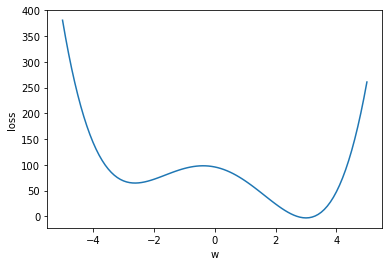

In [2]:
def loss_fn(w):
    return w**4 - 16 * w**2 - 12 * w + 96

ws = np.linspace(-5, 5, 101)
plt.plot(ws, loss_fn(ws))
plt.xlabel('w')
plt.ylabel('loss')

### パラメーターの更新式
$w \rightarrow w - \alpha \frac{\partial loss}{\partial w}$
<br>
loss: 損失関数
<br>
$\alpha$: 学習率 (learning rate)

In [3]:
w = torch.tensor(0.0, requires_grad=True)
loss = loss_fn(w)
print(loss)

tensor(96., grad_fn=<AddBackward0>)


In [4]:
print(w.grad)
loss.backward()
print(w.grad)

None
tensor(-12.)


In [5]:
def iterate(w_init, alpha, n):
    w = torch.tensor(w_init, requires_grad=True)
    w_history = [w_init]
    for _ in range(n):
        loss = loss_fn(w)
        loss.backward()
        with torch.no_grad():
            w -= alpha * w.grad
            w.grad.zero_()
        w_history.append(w.item())
    return w_history

In [6]:
iterate(0.0, 0.01, 20)

[0.0,
 0.11999999731779099,
 0.27833086252212524,
 0.4865342676639557,
 0.7576184272766113,
 1.1026618480682373,
 1.5218862295150757,
 1.98789381980896,
 2.429795742034912,
 2.75351881980896,
 2.919572353363037,
 2.9783895015716553,
 2.994645833969116,
 2.998704671859741,
 2.9996886253356934,
 2.999925136566162,
 2.9999821186065674,
 2.999995708465576,
 2.9999990463256836,
 2.999999761581421,
 3.0]

In [7]:
iterate(0.0, 0.1, 20)

[0.0,
 1.2000000476837158,
 5.548800468444824,
 -43.83225631713867,
 33502.48828125,
 -15041502904320.0,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [8]:
def plot_iterations(w_history):
    ws = np.linspace(-4, 4, 101)
    fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    axes[0].plot(ws, loss_fn(ws))
    axes[0].set_xlabel('w')
    axes[0].set_ylabel('loss')
    axes[1].plot(w_history, range(len(w_history)), 'bo-')
    axes[1].invert_yaxis()
    axes[1].set_ylabel('iteration')

## うまく最小値に収束するケース

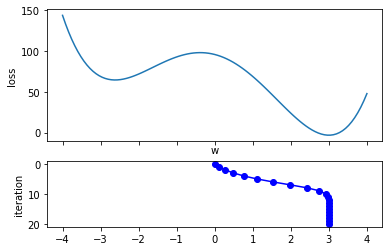

In [9]:
plot_iterations(iterate(0.0, 0.01, 20))

## 初期値が同じでも学習率 $\alpha$ が大きいと極小値に収束してしまうこともある

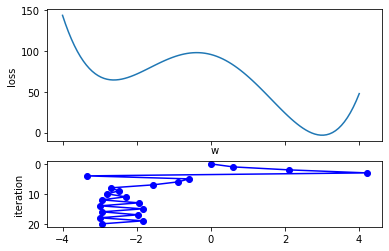

In [10]:
plot_iterations(iterate(0.0, 0.05, 20))

## 学習率 $\alpha$ が大きいと最小値の周りで振動したり、最悪発散してしまうこともある

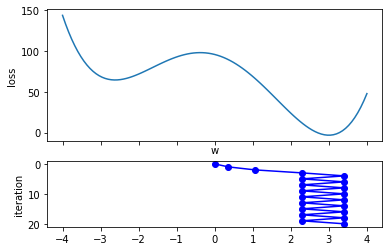

In [11]:
plot_iterations(iterate(0.0, 0.03, 20))